<div style="border-radius:10px;
            border : black solid;
            background-color: ##FFFFFF;
            font-size:160%;
            text-align: left">

<h1 style='; border:0; border-radius: 10px; text-shadow: 1px 1px black; font-weight: bold; color:#511A69'><center> CAR PRICES PREDICTION </center></h1>

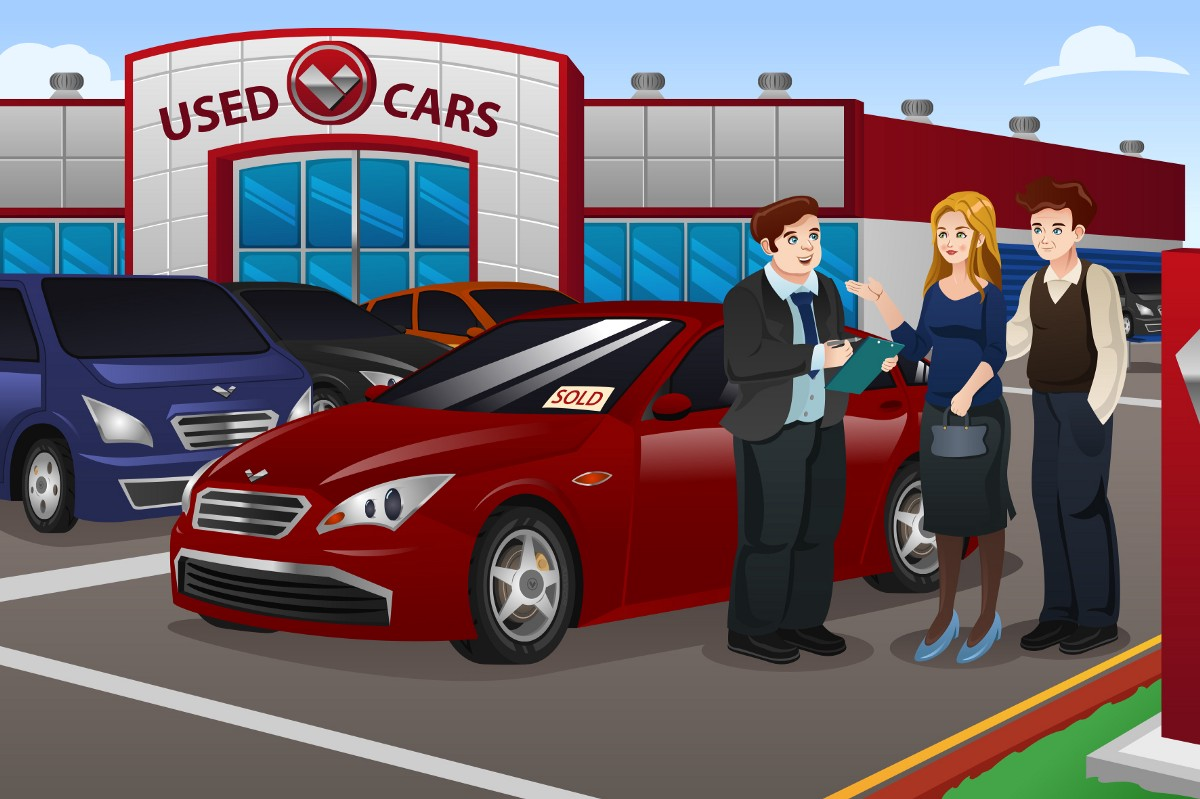

#### We have cardekho vechile dataset. This dataset conatin the information about used cars listed on cardekho website.
#### By using this data set we have to predict the selling price of cars

# Importing libraries

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


# to ignore warnings
import warnings 
warnings.filterwarnings('ignore')


# Load the DataSet

In [2]:
car=pd.read_csv('E:\\Datasets\\Car details v3.csv')
car_df=car.copy()

 We have loaded the data set and created the copy of dataset

In [3]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
print(f'Number of rows are {car_df.shape[0]}\nNumber of columns are {car_df.shape[1]}' )


Number of rows are 8128
Number of columns are 13


## Exploratory Data Analysis

In [5]:
# check the meta data of dataset

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Basic information about dataset
- There are 8128 rows and 13 columns
- There are 3 numerical and 10 categorical columns in data set
- There are null value in mileage, engine, max_power, torque and seats columns


In [6]:
# converting some object dtype in categorical dtype

categorical_col=['fuel','transmission','owner','seller_type']

for col in categorical_col:
    car_df[col]=car_df[col].astype('category')
    


In [8]:
# create brand_name feature from name

car_df['brand_name']=car_df['name'].str.split().str[0]

car_df['brand_name']=car_df['brand_name'].astype('category')


# another way

#car_df["name"].str.extract('([^\s]+)')

- We have extracting out only the brand name from full name of vechile and storing it into brand_name column

In [9]:
# extracting the values of engine and mileage

car_df['engine']=car_df['engine'].str.split().str[0]
car_df['engine']=car_df['engine'].astype('float')

car_df['mileage']=car_df['mileage'].str.split().str[0]
car_df['mileage']=car_df['mileage'].astype('float')

- We are extracting only numerical values from engine column and mileage column

In [10]:
# extracting the max_power

car_df['max_power']=car_df['max_power'].str.split().str[0]
car_df['max_power']=car_df['max_power'][~(car_df['max_power']=='bhp')]
car_df['max_power']=car_df['max_power'].astype('float')

- We are extracting numerical value from max_power column
- There is one row where we have only 'bhp', we will drop this value

In [37]:
# create a feature car_age from year
import datetime
car_df['car_age']=datetime.datetime.now().year-car_df['year']

KeyError: 'year'

- Here we are finding out the age of car by subratcting purchased year to current year and storing the value into age column

## Drop some columns that are not so much necessary

In [12]:
# drop the columns that are not necessary
car_df=car_df.drop(['name','year','torque'],axis=1)

In [13]:
car_df.head().style.background_gradient(cmap='summer')

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_name
0,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.000000,74.000000,5.000000,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.140000,1498.000000,103.520000,5.000000,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.700000,1497.000000,78.000000,5.000000,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.000000,90.000000,5.000000,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.000000,88.200000,5.000000,Maruti


In [14]:
# statistical analysis of dataset

car_df.describe().style.background_gradient(cmap='summer')

,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8128.000000,7907.000000,7907.000000,7912.000000,7907.000000
mean,638271.807702,69819.510827,19.418783,1458.625016,91.517919,5.416719
std,806253.403508,56550.554958,4.037145,503.916303,35.822499,0.959588
min,29999.000000,1.000000,0.000000,624.000000,0.000000,2.000000
25%,254999.000000,35000.000000,16.780000,1197.000000,68.050000,5.000000
50%,450000.000000,60000.000000,19.300000,1248.000000,82.000000,5.000000
75%,675000.000000,98000.000000,22.320000,1582.000000,102.000000,5.000000
max,10000000.000000,2360457.000000,42.000000,3604.000000,400.000000,14.000000


# Analysis of data set

- Minimum selling price is 29999 and the maximum selling price is 10000000
- The driven distance of least driven car is 1 km and tyhe driven distance of most driven car is 2360457
- Minimum mileage is 0 and maximum mileage is 42, and avg mileage is 19.418 
- The number of seats  changes from  2 to 14
- Oldest car is 40 year old and latest car is 3 year old

In [15]:
# statistical analysis of categorical datatype

car_df.describe(include='category')

,fuel,seller_type,transmission,owner,brand_name
count,8128,8128,8128,8128,8128
unique,4,3,2,5,32
top,Diesel,Individual,Manual,First Owner,Maruti
freq,4402,6766,7078,5289,2448


### Analysis of categorical datatypes
- Top selling brand is maruti with frequency : 2448
- Car with fuel type is in most demand with frequency : 4402
- Manual car are more in demand than automatic with frequency : 7708
- People are mostly liking to buy car from First owner: with frequency : 5289


### Checking null values

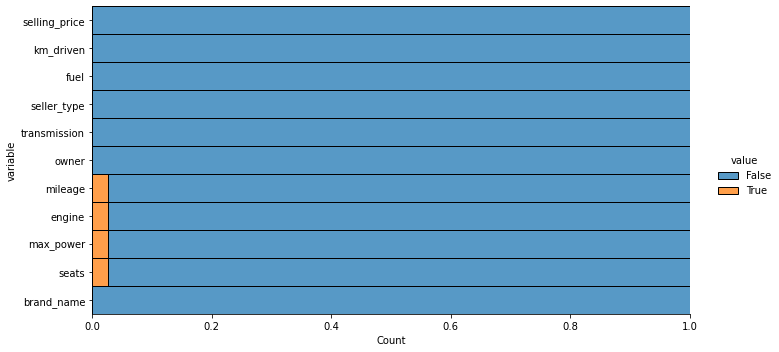

In [16]:
# vissualizing the missing values with seaborn 
sns.displot(data=car_df.isnull().melt(),y='variable',hue='value',
            multiple='fill',aspect=2)


<AxesSubplot:>

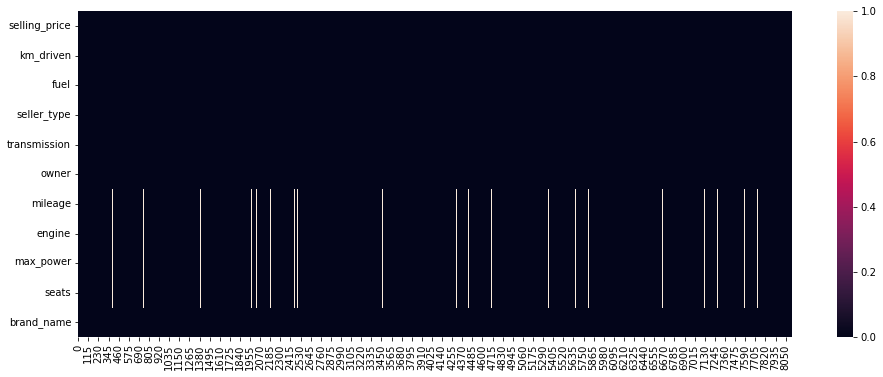

In [17]:
# visulasizing the null values with heatmap
plt.figure(figsize=(16,6))
sns.heatmap(car_df.isnull().T)

In [18]:
# fill the null values

num_col=[col for col in car_df if car_df[col].dtypes !='category']

cat_col=[col for col in car_df if car_df[col].dtypes == 'category']

# filling the missinng values of numerical data type with median

for col in num_col:
    car_df[col].fillna(car_df[col].median(),inplace =True)
    


# filling the missing values of categorical datatypes with mode 

for col in cat_col:
    car_df[col].fillna(car_df[col].mode(),inplace=True)



In [19]:
# check the null values in dataset
car_df.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
brand_name       0
dtype: int64

In [20]:
# count the values of each class in each categorical columns

lst=[]
for col in cat_col:
    a=car_df[col].value_counts()
    lst.append(a)
    
    
lst

[Diesel    4402
 Petrol    3631
 CNG         57
 LPG         38
 Name: fuel, dtype: int64,
 Individual          6766
 Dealer              1126
 Trustmark Dealer     236
 Name: seller_type, dtype: int64,
 Manual       7078
 Automatic    1050
 Name: transmission, dtype: int64,
 First Owner             5289
 Second Owner            2105
 Third Owner              555
 Fourth & Above Owner     174
 Test Drive Car             5
 Name: owner, dtype: int64,
 Maruti           2448
 Hyundai          1415
 Mahindra          772
 Tata              734
 Toyota            488
 Honda             467
 Ford              397
 Chevrolet         230
 Renault           228
 Volkswagen        186
 BMW               120
 Skoda             105
 Nissan             81
 Jaguar             71
 Volvo              67
 Datsun             65
 Mercedes-Benz      54
 Fiat               47
 Audi               40
 Lexus              34
 Jeep               31
 Mitsubishi         14
 Land                6
 Force           

In [21]:
# group by according to fuel
car_df.groupby(by='fuel').mean()

,selling_price,km_driven,mileage,engine,max_power,seats
fuel,,,,,,
CNG,301017.491228,68288.438596,23.824211,1094.192982,62.835789,5.017544
Diesel,791452.921627,83677.137210,19.634607,1682.471831,101.034356,5.711040
LPG,200421.052632,89174.105263,18.634211,1047.605263,61.121053,5.000000
Petrol,462441.061691,52840.861746,19.088956,1184.449738,80.182952,5.045167


## Analysis
- Mean selling price of diesel car is highest with value of 791452.92
- Average mileage of CNG car is highest with value of 23.82


## Visualising the dataset

<AxesSubplot:>

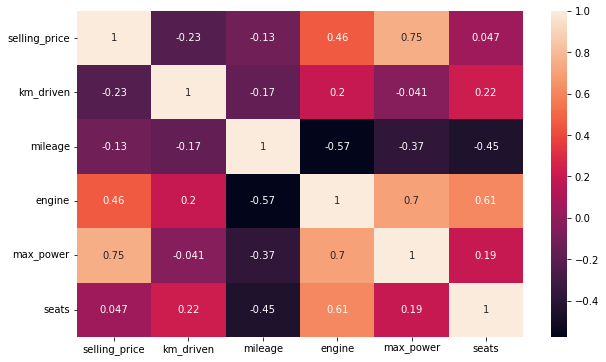

In [22]:
# correlation plot
plt.figure(figsize=(10,6))
sns.heatmap(car_df.corr(), annot=True)

## Correlation 
- Some columns are moderately correlated 
- The correlation :-
- between engine and mileage : -0.57
- between engine and max_power : 0.7
- between engine and setas : 0.61
- There is no multicollinearity in dataset because columns are not highly correlated

## Split  the dataset

In [23]:
# spliting into features and target variable where x conatains features columns

x=car_df.drop('selling_price',axis=1)
y=car_df['selling_price']

In [24]:
x.shape, y.shape

((8128, 10), (8128,))

## Encode the categorical data

In [25]:
# Encode the categorical data

x=pd.get_dummies(x,drop_first=True)

In [26]:
x.head()

,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_name_Mitsubishi,brand_name_Nissan,brand_name_Opel,brand_name_Peugeot,brand_name_Renault,brand_name_Skoda,brand_name_Tata,brand_name_Toyota,brand_name_Volkswagen,brand_name_Volvo
0,145500,23.40,1248.0,74.00,5.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,21.14,1498.0,103.52,5.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,140000,17.70,1497.0,78.00,5.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,23.00,1396.0,90.00,5.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,16.10,1298.0,88.20,5.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x.shape

(8128, 46)

In [28]:
# spliting the data into training ansd testing dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=1)

print(x_train.shape)
print(x_test.shape)

(6096, 46)
(2032, 46)


## Normalize the data

In [29]:
rob_scaler=RobustScaler()
x_train_scaled=rob_scaler.fit_transform(x_train)
x_test_scaled=rob_scaler.transform(x_test)

In [30]:
x_train

,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,brand_name_Mitsubishi,brand_name_Nissan,brand_name_Opel,brand_name_Peugeot,brand_name_Renault,brand_name_Skoda,brand_name_Tata,brand_name_Toyota,brand_name_Volkswagen,brand_name_Volvo
2739,25000,25.80,1498.0,98.60,5.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7440,30400,18.50,1198.0,86.80,5.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6341,100000,18.30,1991.0,147.90,5.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4656,120000,19.30,1248.0,73.90,5.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6279,91000,12.55,2982.0,168.50,7.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,100000,16.10,796.0,37.00,4.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5192,152000,21.19,1396.0,88.73,5.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3980,70000,21.10,814.0,55.20,5.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
235,110000,21.10,1248.0,73.90,5.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Model taining

## Linear Regression Model 

In [38]:
model_1 = LinearRegression()
model_1.fit(x_train_scaled,y_train)
y_pred = model_1.predict(x_test)
y_pred

array([-9.59767406e+09, -5.35013987e+09, -7.19719877e+09, ...,
       -5.96047611e+08, -6.78567953e+09, -5.95460792e+09])

In [39]:
print('mean_absolute_error:', mean_absolute_error(y_pred,y_test))
print('mean_squared_error:', mean_squared_error(y_pred,y_test))
print('r2 score:',r2_score(y_pred,y_test))

mean_absolute_error: 8365909874.547194
mean_squared_error: 1.4009047734698618e+20
r2 score: -0.9982934259475114


## Decision Tree Model

In [41]:
model_2 = DecisionTreeRegressor()
model_2.fit(x_train_scaled,y_train)
y_pred = model_2.predict(x_test)
y_pred

array([1000000., 1000000., 1000000., ..., 1000000., 3100000., 1000000.])

In [42]:
print('mean_absolute_error:', mean_absolute_error(y_pred,y_test))
print('mean_squared_error:', mean_squared_error(y_pred,y_test))
print('r2 score:',r2_score(y_pred,y_test))

mean_absolute_error: 693808.5344488189
mean_squared_error: 907214441430.7362
r2 score: -3.552365682061563


## Conclusion

- In this problem statement whave to predict the selling price of car base on some features
- First we have collected the dataset
- We cleaned the dataset
- We have done some exploratory data analysis on data set
- We done some visualization
- We done fetaure scalin and label encoding
- In the last we trainde multiple models on training dataset
- On the bases of performance of these models we have selected best one model out of them 
- In the end we  have done some prediction by using final model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
